데이터가 있는 부산으로 실험을 먼저 해보겠습니다.
-> 방향으로만 똑같은 패턴이 있는지 검사합니다.

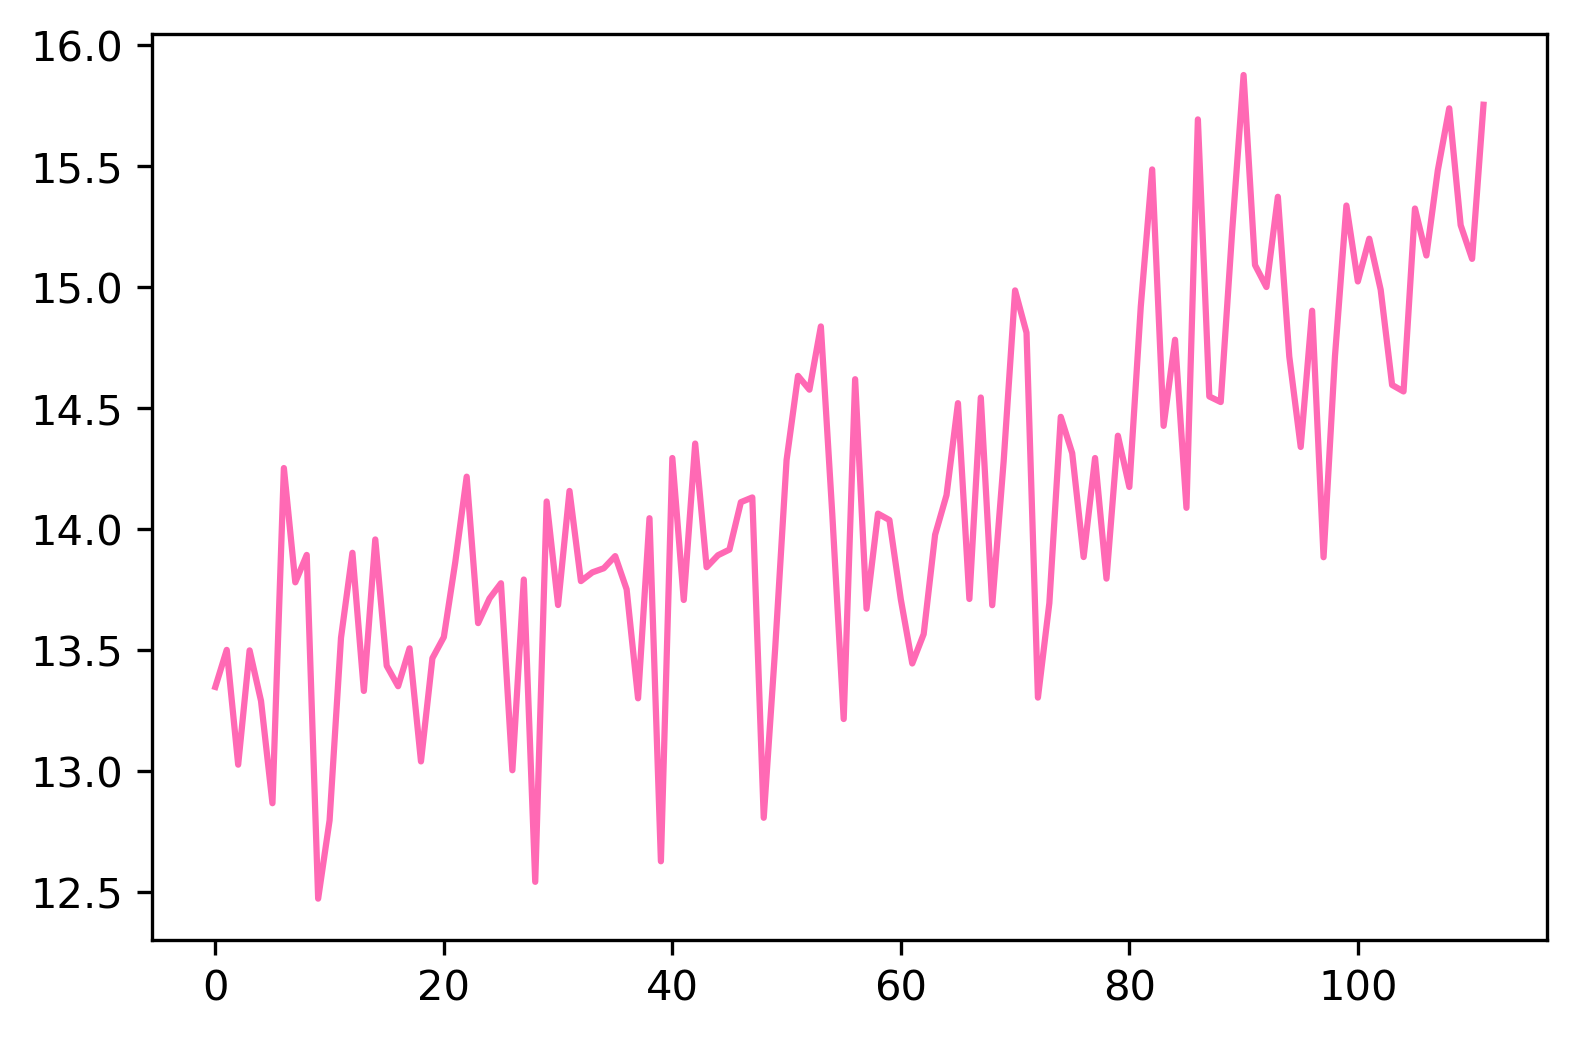

In [1]:
import csv
import matplotlib.pyplot as plt
f = open('busan.csv', encoding='cp949')
data = csv.reader(f)
for i in range(8):
    next(data)


one_way=[]
increase=[]
decrease=[]
normal={i:0 for i in range(1908,2020)}
day=365.0
num_year=1907
middle=0

for row in data :
    try:
        if row[0][:4] not in ['1907','1950','1951','1952','1953','2020'] :
            if row[0][5:]=='01-01':
                if float(row[0][:4])%4==0 and row[0][:4]!='2000':
                    day=366.0
                else: day=365.0
            normal[int(row[0][:4])]+=float(row[2])/day
    except: pass
for i in range(1914,2020):
    if i <1950 or i> 1958:
        temp_1=normal[i-5]-normal[i-6]
        temp_0=normal[i-4]-normal[i-5]
        temp_init=normal[i-3]-normal[i-4]
        temp_left=normal[i-2]-normal[i-3]
        temp_right=normal[i-1]-normal[i-2]
        temp_result=normal[i]-normal[i-1]
        ratio_1=temp_1/temp_right
        ratio_0=temp_0/temp_right
        ratio_init=temp_init/temp_right
        ratio=temp_left/temp_right
        result_ratio=temp_result/temp_right
        if(temp_right>=0):
            increase.append([i,ratio_init,ratio,result_ratio,ratio_0,ratio_1])
        else:
            decrease.append([i,ratio_init,ratio,result_ratio,ratio_0,ratio_1])
        
for i in range(1950,1954):
    temp_1=normal[i-5]-normal[i-6]
    temp_0=normal[i-4]-normal[i-5]
    temp_init=normal[i-3]-normal[i-4]
    temp_left=normal[i-2]-normal[i-3]
    temp_right=normal[i-1]-normal[i-2]
    ratio_1=temp_1/temp_right
    ratio_0=temp_0/temp_right
    ratio_init=temp_init/temp_right
    ratio=temp_left/(temp_right)
    check=[]
    while(True):
        least=1000
        least_result=0
        similar_year=0
        temp=1000
        if(temp_right>=0):
            for j in increase:
                if j[0] not in check:
                    temp=(ratio-j[2])**2+0.7*(ratio_init-j[1])**2+0.5*(ratio_0-j[4])**2+0.3*(ratio_1-j[5])**2
                    if temp<least:
                        least=temp
                        least_result=j[3]
                        similar_year=j[0]
        if(temp_right<0):
            for j in decrease:
                if j[0] not in check:
                    temp=(ratio-j[2])**2+0.7*(ratio_init-j[1])**2+0.5*(ratio_0-j[4])**2+0.3*(ratio_1-j[5])**2
                    if temp<least:
                        least=temp
                        least_result=j[3]
                        similar_year=j[0]
        normal[i]=least_result*temp_right+normal[i-1]
        if (normal[i]-normal[i-1])**2<4 or similar_year==0:
            break
        else : 
            check.append(similar_year)

        
for i in range(1908,2020):
    one_way.append(normal[i])
                   
plt.figure( dpi = 300)# size 크게 그린거
plt.plot(one_way,'hotpink') #reulst를 빨간색으로

plt.show()


이번에는 양방향으로 검사하며 예측해보겠습니다.

[]


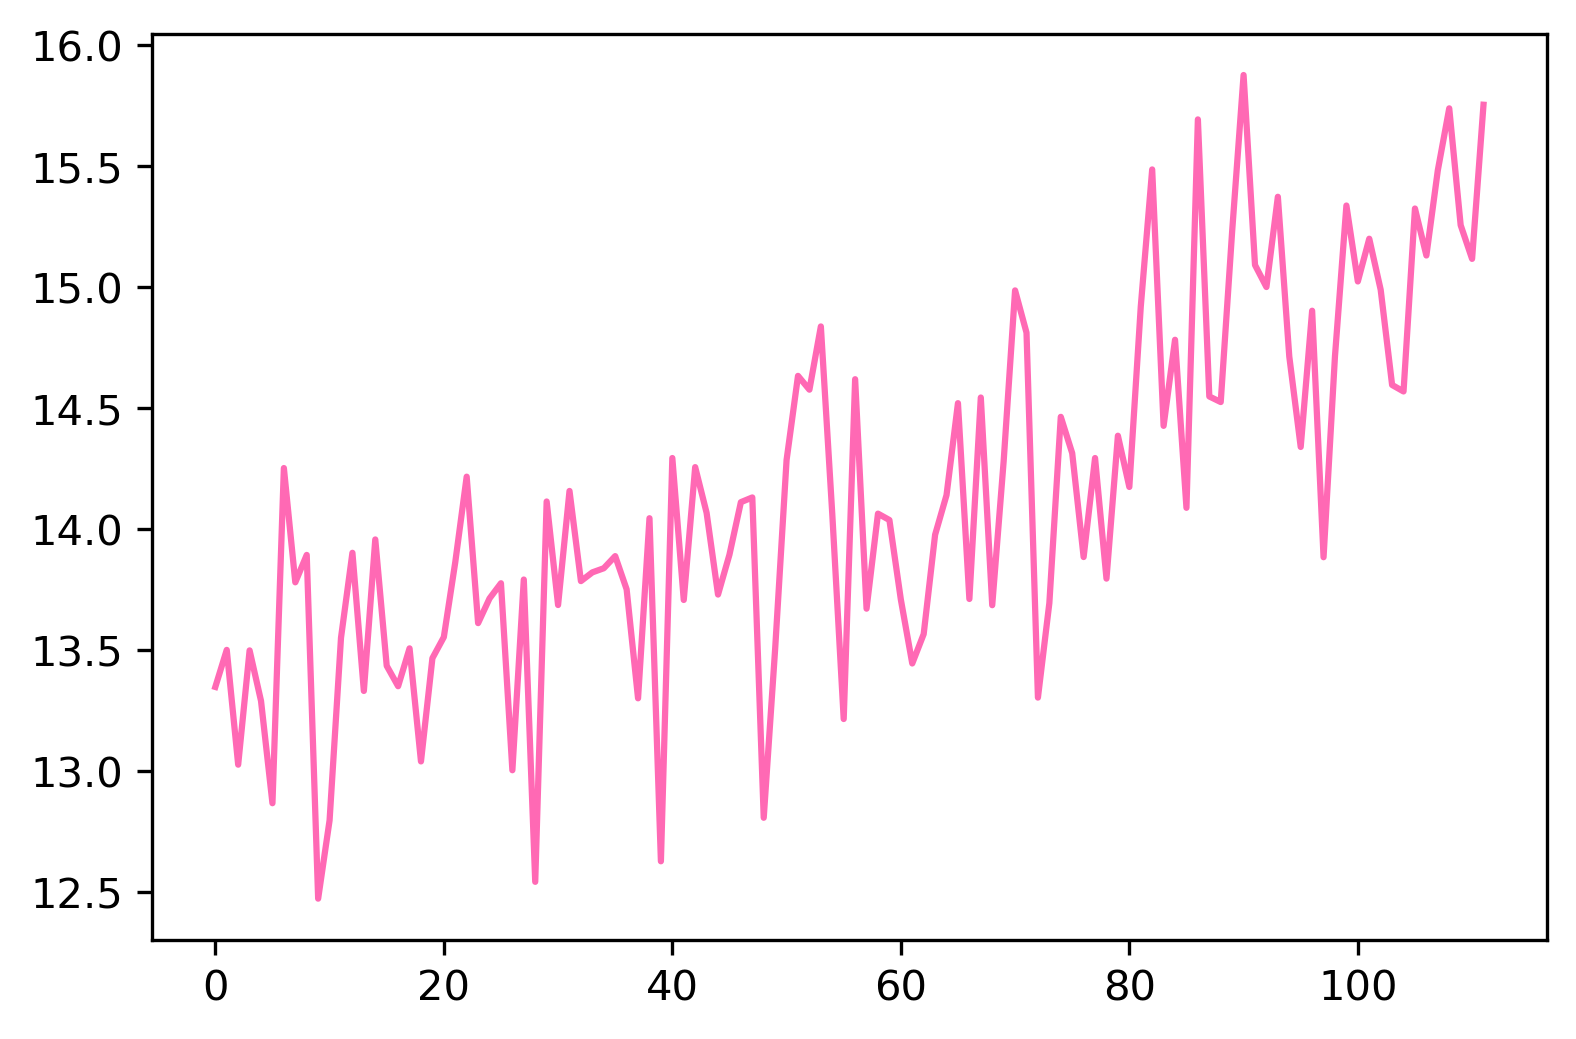

In [2]:
import csv
import matplotlib.pyplot as plt
f = open('busan.csv', encoding='cp949')
data = csv.reader(f)
for i in range(8):
    next(data)


two_way=[]
increase=[]
decrease=[]
re_increase=[]
re_decrease=[]
normal={i:0 for i in range(1908,2020)}
day=365.0
num_year=1907
middle=0

for row in data :
    try:
        if row[0][:4] not in ['1907','1950','1951','1952','1953','2020'] :
            if row[0][5:]=='01-01':
                if float(row[0][:4])%4==0 and row[0][:4]!='2000':
                    day=366.0
                else: day=365.0
            normal[int(row[0][:4])]+=float(row[2])/day
    except: pass
for i in range(1914,2020):
    if i <1950 or i> 1958:
        temp_1=normal[i-5]-normal[i-6]
        temp_0=normal[i-4]-normal[i-5]
        temp_init=normal[i-3]-normal[i-4]
        temp_left=normal[i-2]-normal[i-3]
        temp_right=normal[i-1]-normal[i-2]
        temp_result=normal[i]-normal[i-1]
        ratio_1=temp_1/temp_right
        ratio_0=temp_0/temp_right
        ratio_init=temp_init/temp_right
        ratio=temp_left/temp_right
        result_ratio=temp_result/temp_right
        if(temp_right>=0):
            increase.append([i,ratio_init,ratio,result_ratio,ratio_0,ratio_1])
        else:
            decrease.append([i,ratio_init,ratio,result_ratio,ratio_0,ratio_1])
#-----------------------------------------------------
for i in range(1908,2014):
    if i <1944 or i> 1953:
        temp_1=normal[i+5]-normal[i+6]
        temp_0=normal[i+4]-normal[i+5]
        temp_init=normal[i+3]-normal[i+4]
        temp_left=normal[i+2]-normal[i+3]
        temp_right=normal[i+1]-normal[i+2]
        temp_result=normal[i]-normal[i+1]
        ratio_1=temp_1/temp_right
        ratio_0=temp_0/temp_right
        ratio_init=temp_init/temp_right
        ratio=temp_left/temp_right
        result_ratio=temp_result/temp_right
        if(temp_right>=0):
            re_increase.append([i,ratio_init,ratio,result_ratio,ratio_0,ratio_1])
        else:
            re_decrease.append([i,ratio_init,ratio,result_ratio,ratio_0,ratio_1])
        
for i in range(1950,1954):
    temp_1=normal[i-5]-normal[i-6]
    temp_0=normal[i-4]-normal[i-5]
    temp_init=normal[i-3]-normal[i-4]
    temp_left=normal[i-2]-normal[i-3]
    temp_right=normal[i-1]-normal[i-2]
    ratio_1=temp_1/temp_right
    ratio_0=temp_0/temp_right
    ratio_init=temp_init/temp_right
    ratio=temp_left/(temp_right)
    
    check=[]
    while(True):
        least=1000
        least_result=0
        similar_year=0
        temp=1000
        if(temp_right>=0):
            for j in increase:
                if j[0] not in check:
                    temp=(ratio-j[2])**2+0.7*(ratio_init-j[1])**2+0.5*(ratio_0-j[4])**2+0.3*(ratio_1-j[5])**2
                    if temp<least:
                        least=temp
                        least_result=j[3]
                        similar_year=j[0]
        if(temp_right<0):
            for j in decrease:
                if j[0] not in check:
                    temp=(ratio-j[2])**2+0.7*(ratio_init-j[1])**2+0.5*(ratio_0-j[4])**2+0.3*(ratio_1-j[5])**2
                    if temp<least:
                        least=temp
                        least_result=j[3]
                        similar_year=j[0]

        normal[i]=(least_result*temp_right+normal[i-1])
        if (normal[i]-normal[i-1])**2<4 or similar_year==0:
            break
        else : 
            check.append(similar_year)

p=[normal[1953],normal[1952],normal[1951],normal[1950]]

for k in range(4):
    i=1953-k
    temp_1=normal[i+5]-normal[i+6]
    temp_0=normal[i+4]-normal[i+5]
    temp_init=normal[i+3]-normal[i+4]
    temp_left=normal[i+2]-normal[i+3]
    temp_right=normal[i+1]-normal[i+2]
    ratio_1=temp_1/temp_right
    ratio_0=temp_0/temp_right
    ratio_init=temp_init/temp_right
    ratio=temp_left/temp_right
    
    check=[]
    while(True):
        least=1000
        least_result=0
        similar_year=0
        temp=1000
        if(temp_right>=0):
            for j in re_increase:
                if j[0] not in check:
                    temp=(ratio-j[2])**2+0.7*(ratio_init-j[1])**2+0.5*(ratio_0-j[4])**2+0.3*(ratio_1-j[5])**2
                    if temp<least:
                        least=temp
                        least_result=j[3]
                        similar_year=j[0]
        if(temp_right<0):
            for j in re_decrease:
                if j[0] not in check:
                    temp=(ratio-j[2])**2+0.7*(ratio_init-j[1])**2+0.5*(ratio_0-j[4])**2+0.3*(ratio_1-j[5])**2
                    if temp<least:
                        least=temp
                        least_result=j[3]
                        similar_year=j[0]
        
        normal[i]=(least_result*temp_right+normal[i-1])
        if (normal[i]-normal[i-1])**2<4 or similar_year==0:
            if i==1953:
                u=0.9
            elif i==1952:
                u=0.7
            elif i==1951:
                u=0.3
            elif i==1950:
                u=0.1
            normal[i]=normal[i]*u+p[k]*(1-u)
            break
        else : 
            check.append(similar_year)
print(check)
        
for i in range(1908,2020):
    two_way.append(normal[i])
                   
plt.figure( dpi = 300)# size 크게 그린거
plt.plot(two_way,'hotpink') #reulst를 빨간색으로

plt.show()


실제와 그래프에 한번에 나타내보겠습니다.

[]


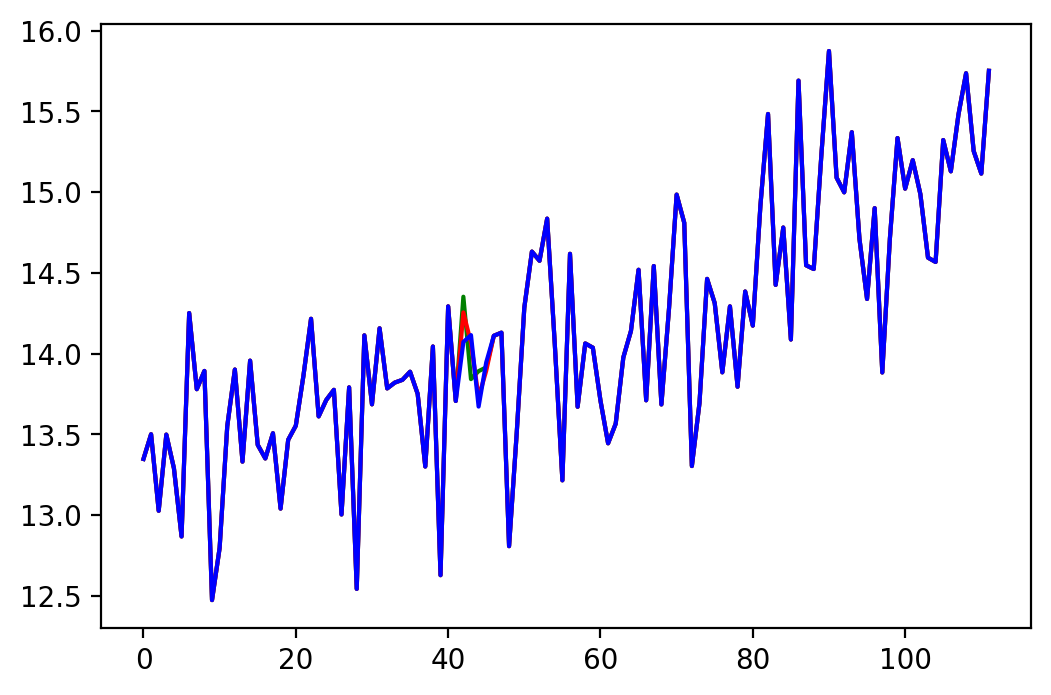

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
f = open('busan.csv', encoding='cp949')
data = csv.reader(f)
for i in range(8):
    next(data)
origin=[]
consequence=[]
increase=[]
decrease=[]
normal={i:0 for i in range(1908,2020)}
day=365.0
num_year=1907
middle=0
temp=[]
for row in data :
    try:
        if row[0][:4] not in ['1907','2020']:
            if row[0][5:]=='01-01':
                if float(row[0][:4])%4==0 and row[0][:4]!='2000':
                    day=366.0
                else: day=365.0
            normal[int(row[0][:4])]+=float(row[2])/day
            if row[0][5:]=='12-31':
                num_year+=1
        else:
            if row[0][5:]=='12-31':
                num_year+=1
    except:print(row)

for row in data :
    if row[0][:4] not in ['1907']:
        if row[0][5:]=='01-01':
            if float(row[0][:4])%4==0 and row[0][:4]!='2000':
                day=366.0
            else: day=365.0
        normal[num_year]+=float(row[2])/day
        if row[0][5:]=='12-31':
            num_year+=1

for i in range(1908,2020):
    if i in [1950,1951,1952,1953]:
        temp.append(np.nan)
        origin.append(normal[i])
    else:
        temp.append(normal[i])
        origin.append(normal[i])

temp_inter=pd.Series(temp).interpolate(method='polynomial',order=3)

plt.figure( dpi = 200)# size 크게 그린거
# plt.plot(temp_inter,'g') #reulst를 빨간색으로

# plt.plot(consequence2,'hotpink')
plt.plot(one_way,'g')
plt.plot(two_way,'r')
plt.plot(origin,'b')
plt.show()


서울 데이터는 아래와 같습니다. 0인 부분은 6.25전쟁때문에 사라진 데이터입니다.

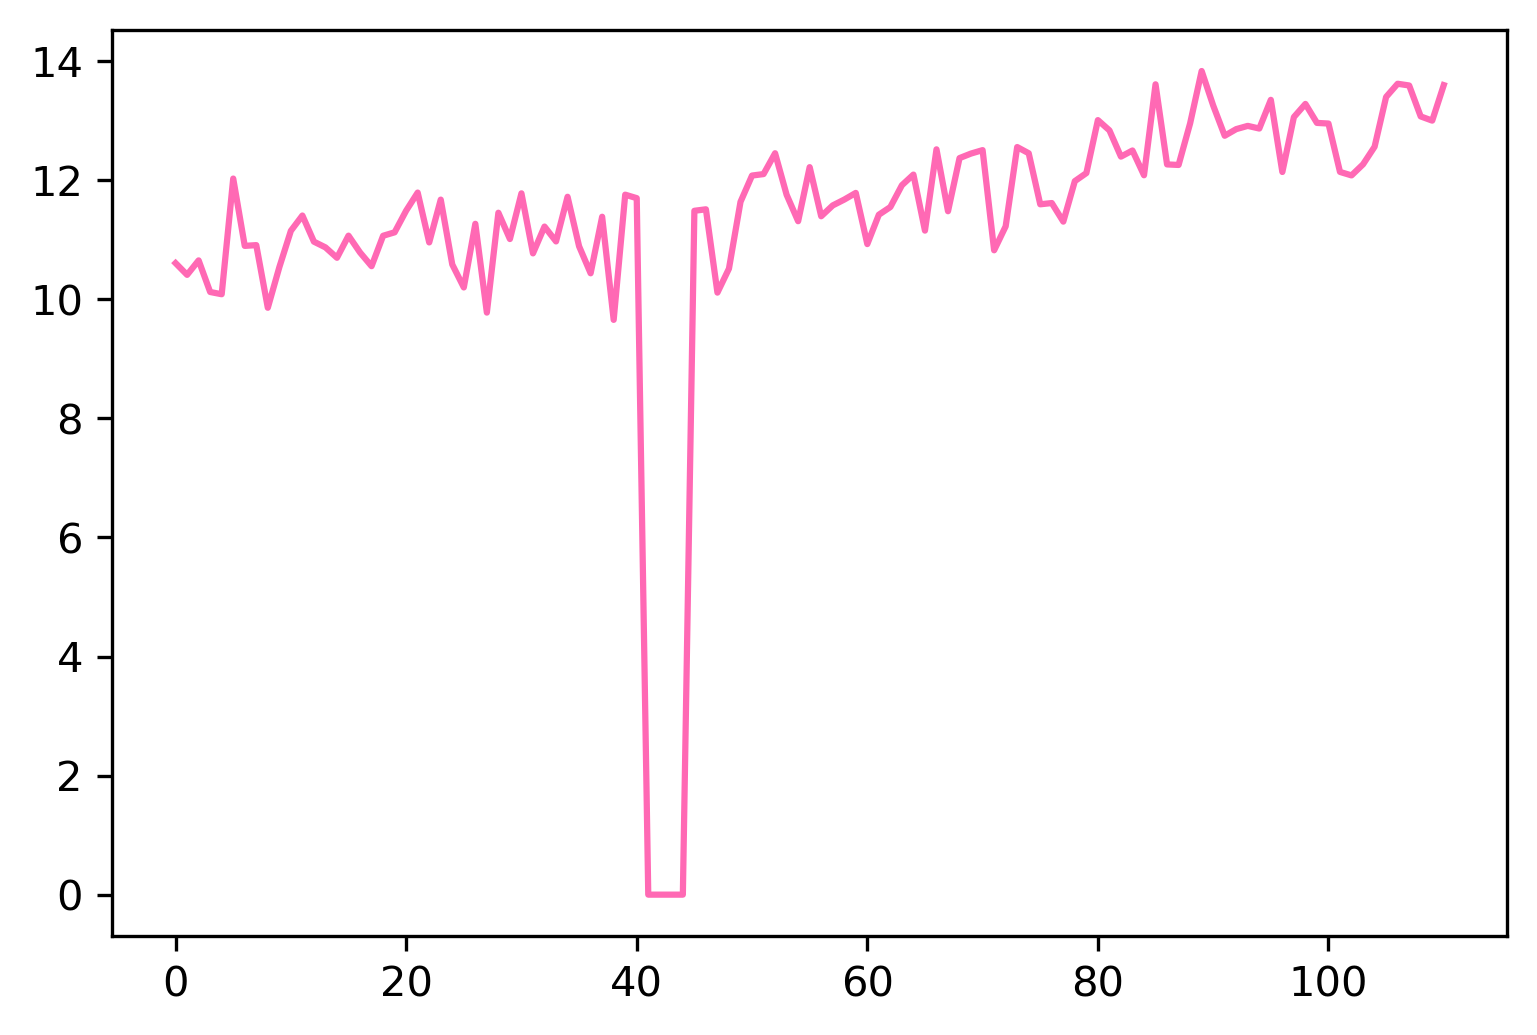

In [25]:
import csv
import matplotlib.pyplot as plt
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data)

year_1950=[]
year_1951=[]
year_1952=[]
consequence=[]
increase=[]
decrease=[]
normal={i:0 for i in range(1908,2020)}
day=365.0
num_year=1907
middle=0
seoul=[]
real_seoul=[]
for row in data :
    if row[0][:4] not in ['1907','1950','1951','1952','1953','2020'] and '1953' not in row[0]:
        if row[0][5:]=='01-01':
            if float(row[0][:4])%4==0 and row[0][:4]!='2000':
                day=366.0
            else: day=365.0
        normal[int(row[0][:4])]+=float(row[2])/day
        if row[0][5:]=='12-31':
            num_year+=1
    else:
        if row[0][5:]=='12-31':
            num_year+=1
        

for row in data :
    if row[0][:4] not in ['1907','1950','1951','1952','1953']:
        if row[0][5:]=='01-01':
            if float(row[0][:4])%4==0 and row[0][:4]!='2000':
                day=366.0
            else: day=365.0
        normal[num_year]+=float(row[2])/day
        if row[0][5:]=='12-31':
            num_year+=1

seoul.append(10.427322404371594)
for i in range(1909,2020):
    real_seoul.append(normal[i])
    if i in [1907,1950,1951,1952,1953]:
        normal[i]+=11
    seoul.append(normal[i])

plt.figure( dpi = 300)# size 크게 그린거
plt.plot(real_seoul,'hotpink') #reulst를 빨간색으로

plt.show()


이번에는 위에서 했던 양방향을 가지고 서울 데이터를 예측해보겠습니다.

[]


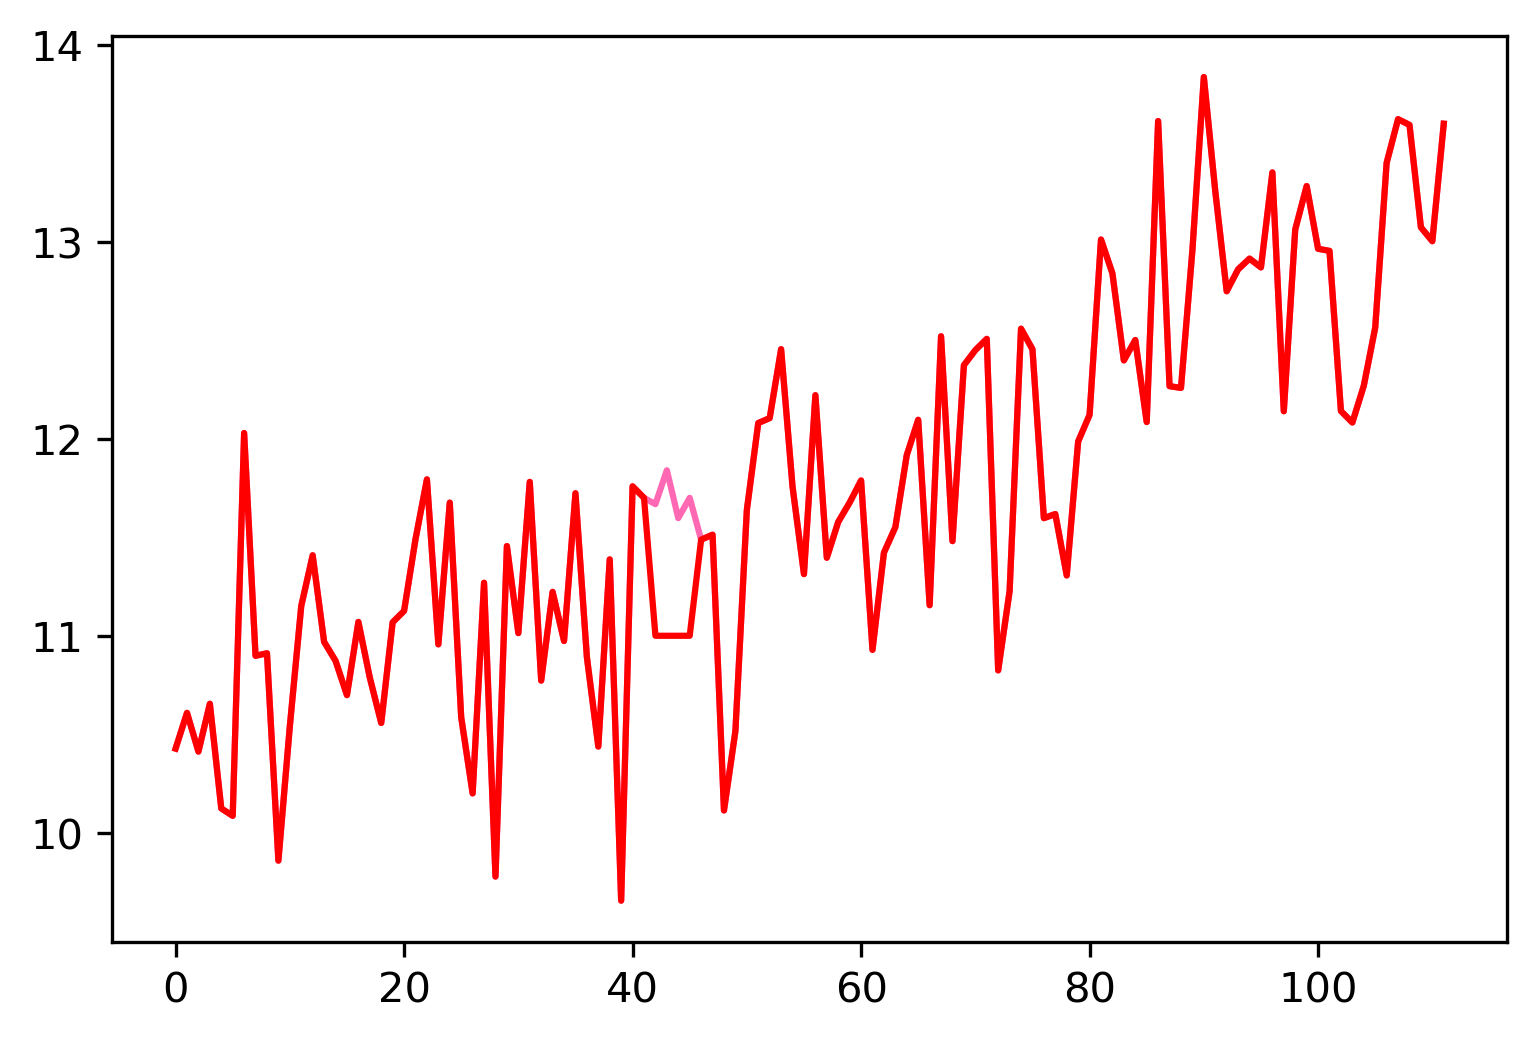

In [26]:
import csv
import matplotlib.pyplot as plt
f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
for i in range(8):
    next(data)


two_way=[]
increase=[]
decrease=[]
re_increase=[]
re_decrease=[]
normal={i:0 for i in range(1908,2020)}
day=365.0
num_year=1907
middle=0

for row in data :
    try:
        if row[0][:4] not in ['1907','1950','1951','1952','1953','2020'] :
            if row[0][5:]=='01-01':
                if float(row[0][:4])%4==0 and row[0][:4]!='2000':
                    day=366.0
                else: day=365.0
            normal[int(row[0][:4])]+=float(row[2])/day
    except: pass
for i in range(1914,2020):
    if i <1950 or i> 1958:
        temp_1=normal[i-5]-normal[i-6]
        temp_0=normal[i-4]-normal[i-5]
        temp_init=normal[i-3]-normal[i-4]
        temp_left=normal[i-2]-normal[i-3]
        temp_right=normal[i-1]-normal[i-2]
        temp_result=normal[i]-normal[i-1]
        ratio_1=temp_1/temp_right
        ratio_0=temp_0/temp_right
        ratio_init=temp_init/temp_right
        ratio=temp_left/temp_right
        result_ratio=temp_result/temp_right
        if(temp_right>=0):
            increase.append([i,ratio_init,ratio,result_ratio,ratio_0,ratio_1])
        else:
            decrease.append([i,ratio_init,ratio,result_ratio,ratio_0,ratio_1])
#-----------------------------------------------------
for i in range(1908,2014):
    if i <1944 or i> 1953:
        temp_1=normal[i+5]-normal[i+6]
        temp_0=normal[i+4]-normal[i+5]
        temp_init=normal[i+3]-normal[i+4]
        temp_left=normal[i+2]-normal[i+3]
        temp_right=normal[i+1]-normal[i+2]
        temp_result=normal[i]-normal[i+1]
        ratio_1=temp_1/temp_right
        ratio_0=temp_0/temp_right
        ratio_init=temp_init/temp_right
        ratio=temp_left/temp_right
        result_ratio=temp_result/temp_right
        if(temp_right>=0):
            re_increase.append([i,ratio_init,ratio,result_ratio,ratio_0,ratio_1])
        else:
            re_decrease.append([i,ratio_init,ratio,result_ratio,ratio_0,ratio_1])
        
for i in range(1950,1954):
    temp_1=normal[i-5]-normal[i-6]+1e+04
    temp_0=normal[i-4]-normal[i-5]+1e+04
    temp_init=normal[i-3]-normal[i-4]+1e+04
    temp_left=normal[i-2]-normal[i-3]+1e+04
    temp_right=normal[i-1]-normal[i-2]+1e+04
    ratio_1=temp_1/temp_right
    ratio_0=temp_0/temp_right
    ratio_init=temp_init/temp_right
    ratio=temp_left/(temp_right)
    
    check=[]
    while(True):
        least=1000
        least_result=0
        similar_year=0
        temp=1000
        if(temp_right>=0):
            for j in increase:
                if j[0] not in check:
                    temp=(ratio-j[2])**2+0.7*(ratio_init-j[1])**2+0.5*(ratio_0-j[4])**2+0.3*(ratio_1-j[5])**2
                    if temp<least:
                        least=temp
                        least_result=j[3]
                        similar_year=j[0]
        if(temp_right<0):
            for j in decrease:
                if j[0] not in check:
                    temp=(ratio-j[2])**2+0.7*(ratio_init-j[1])**2+0.5*(ratio_0-j[4])**2+0.3*(ratio_1-j[5])**2
                    if temp<least:
                        least=temp
                        least_result=j[3]
                        similar_year=j[0]

        normal[i]=(least_result*temp_right+normal[i-1])
        if (normal[i]-normal[i-1])**2<4 or similar_year==0:
            break
        else : 
            check.append(similar_year)

p=[normal[1953],normal[1952],normal[1951],normal[1950]]

for k in range(4):
    i=1953-k
    temp_1=normal[i+5]-normal[i+6]
    temp_0=normal[i+4]-normal[i+5]
    temp_init=normal[i+3]-normal[i+4]
    temp_left=normal[i+2]-normal[i+3]
    temp_right=normal[i+1]-normal[i+2]
    ratio_1=temp_1/temp_right
    ratio_0=temp_0/temp_right
    ratio_init=temp_init/temp_right
    ratio=temp_left/temp_right
    
    check=[]
    while(True):
        least=1000
        least_result=0
        similar_year=0
        temp=1000
        if(temp_right>=0):
            for j in re_increase:
                if j[0] not in check:
                    temp=(ratio-j[2])**2+0.7*(ratio_init-j[1])**2+0.5*(ratio_0-j[4])**2+0.3*(ratio_1-j[5])**2
                    if temp<least:
                        least=temp
                        least_result=j[3]
                        similar_year=j[0]
        if(temp_right<0):
            for j in re_decrease:
                if j[0] not in check:
                    temp=(ratio-j[2])**2+0.7*(ratio_init-j[1])**2+0.5*(ratio_0-j[4])**2+0.3*(ratio_1-j[5])**2
                    if temp<least:
                        least=temp
                        least_result=j[3]
                        similar_year=j[0]
        
        normal[i]=(least_result*temp_right+normal[i-1])
        if (normal[i]-normal[i-1])**2<4 or similar_year==0:
            if i==1953:
                u=0.9
            elif i==1952:
                u=0.7
            elif i==1951:
                u=0.3
            elif i==1950:
                u=0.1
            normal[i]=normal[i]*u+p[k]*(1-u)
            break
        else : 
            check.append(similar_year)
print(check)
        
for i in range(1908,2020):
    two_way.append(normal[i])

plt.figure( dpi = 300)# size 크게 그린거
plt.plot(two_way,'hotpink') #reulst를 빨간색으로
plt.plot(seoul,'red') #reulst를 빨간색으로
plt.show()
